<a href="https://colab.research.google.com/github/marwahfaraj/music-genre-classification/blob/niyat-feature/03_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project: Music Genre Classification using Machine Learning
          
 Niyat Kahsay & Marwah Faraj
 Summer 2025

Description:

This project aims to automatically classify songs into genres based on audio features provided in the Spotify 1.2M Songs Dataset. The workflow includes data exploration, preprocessing, model building, evaluation, and visualization.

Purpose:

Apply supervised learning techniques on real-world audio data
Explore audio feature-based genre classification
Build a portfolio-ready project demonstrating practical machine learning skills

#Data Preparation

## Import Libraries

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, f1_score)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import numpy as np
import time
import pandas as pd
import plotly.express as px
from scipy.stats import mode
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Load Data


In [5]:
import pandas as pd
data = pd.read_csv('/content/spotify_songs.csv')
data.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


#Data Exploration

In [6]:
print(data.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [8]:
data.describe(include = "all")

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833,32828,32828,32833.000000,32833,32828,32833,32833,32833,32833,...,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
unique,28356,23449,10692,NaN,22545,19743,4530,449,471,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,NaN,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,2020-01-10,Indie Poptimism,4JkkvMpVl4lSioqQjeAL0q,edm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,22,161,NaN,42,139,270,308,247,6043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,42.477081,NaN,NaN,NaN,NaN,NaN,NaN,...,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,NaN,NaN,NaN,24.984074,NaN,NaN,NaN,NaN,NaN,NaN,...,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,NaN,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000


In [23]:
# Feature engineering
data['track_album_release_year'] = pd.to_datetime(
      data['track_album_release_date'], errors='coerce').dt.year
data['track_album_release_year'].fillna(data['track_album_release_year'].median(), inplace=True)
data['duration_s'] = data['duration_ms'] / 1000  # Convert to seconds
data.drop('duration_ms', axis=1, inplace=True)

In [24]:
# Encode target variable
genre_encoder = LabelEncoder()
data['genre_encoded'] = genre_encoder.fit_transform(data['playlist_genre'])

In [26]:
# Select relevant features
features = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_s',
            'track_popularity', 'track_album_release_year']

X = data[features]
y = data['genre_encoded']

In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Exploratory Analysis

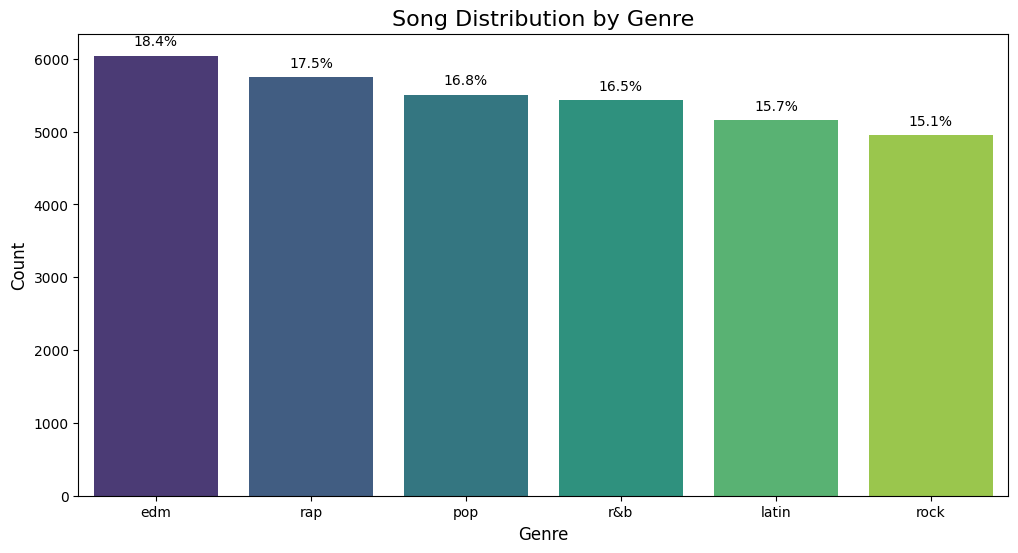

In [9]:
# Genre Distribution Visualization
plt.figure(figsize=(12, 6))
genre_counts = data['playlist_genre'].value_counts()
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title('Song Distribution by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add percentage labels
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=10)
plt.show()


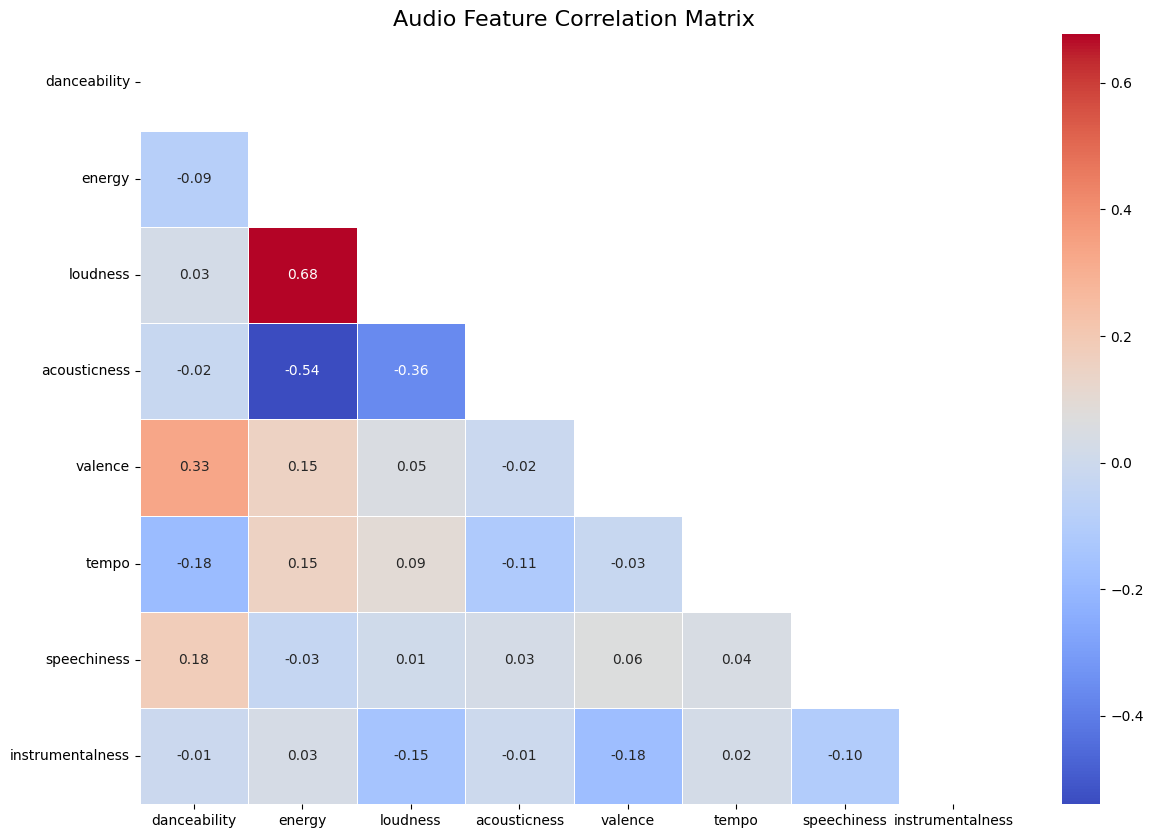

In [10]:

# Feature Correlation Matrix
plt.figure(figsize=(14, 10))
audio_features = ['danceability', 'energy', 'loudness',
                 'acousticness', 'valence', 'tempo',
                 'speechiness', 'instrumentalness']
corr_matrix = data[audio_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f",
            cmap="coolwarm", linewidths=0.5)
plt.title("Audio Feature Correlation Matrix", fontsize=16)
plt.show()

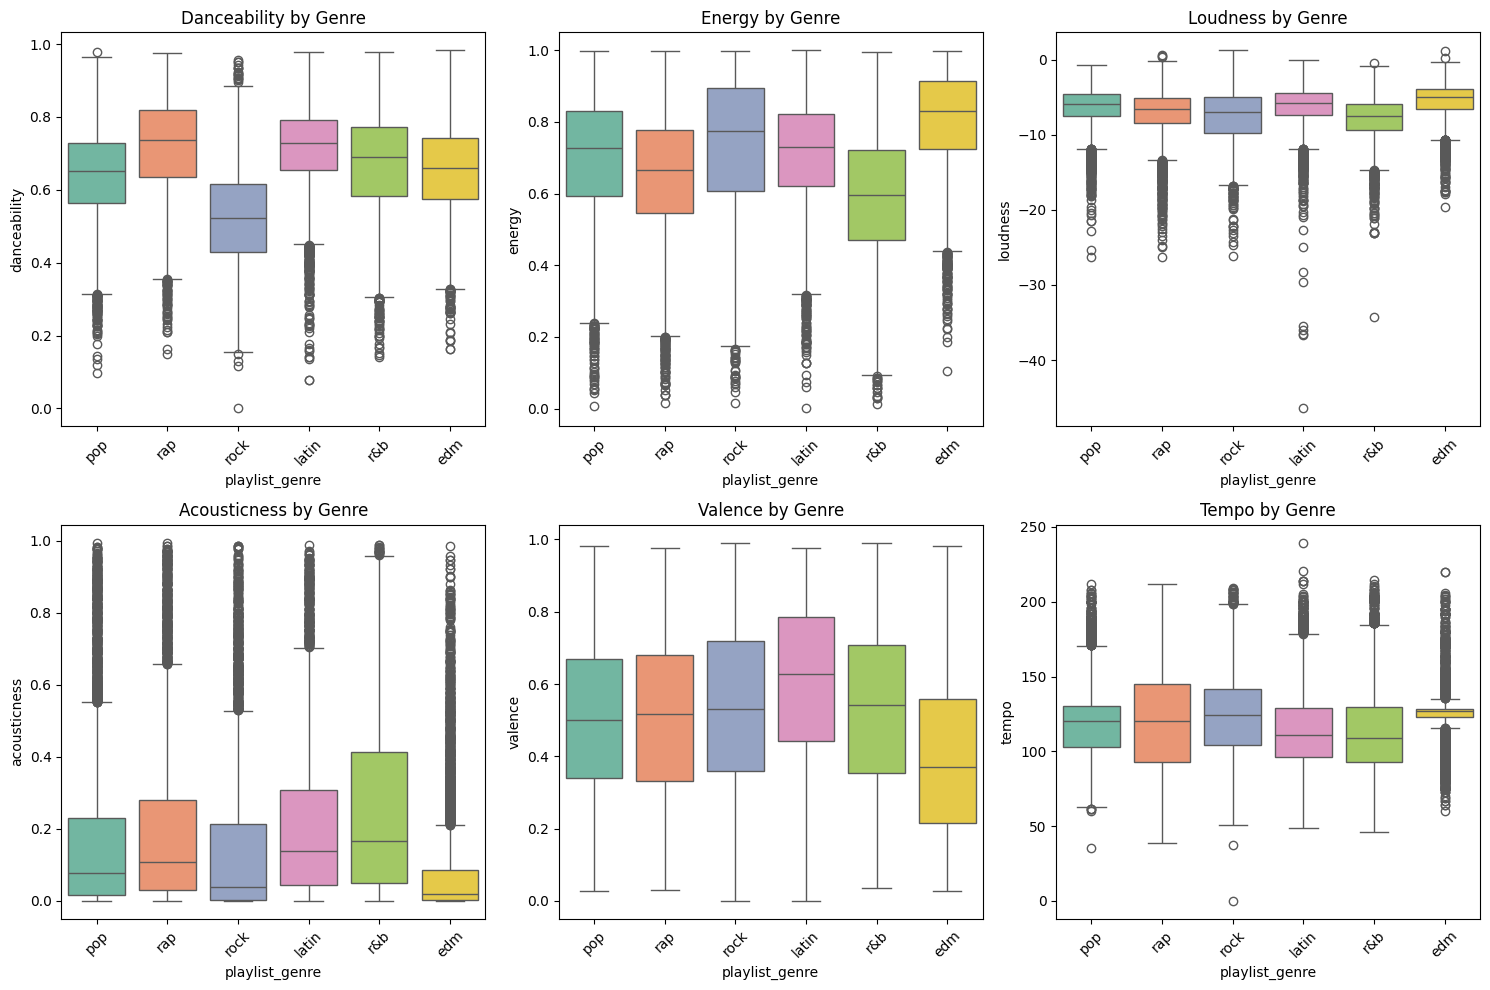

In [11]:
# Feature Distribution by Genre (Boxplot)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='playlist_genre', y=feature, data=data, palette="Set2")
    plt.title(f'{feature.capitalize()} by Genre', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The presence of outliers in audio features is common; however, since they may contain important information for genre classification, we will leave them as they are.

In [14]:

# Genre Feature Radar Chart
genre_means = data.groupby('playlist_genre')[audio_features].mean().reset_index()

fig = go.Figure()
for genre in genre_means['playlist_genre']:
    fig.add_trace(go.Scatterpolar(
        r=genre_means[genre_means['playlist_genre'] == genre][audio_features].values[0],
        theta=audio_features,
        fill='toself',
        name=genre
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    showlegend=True,
    title='Audio Feature Profiles by Genre',
    height=600
)
fig.show()

##Model Development

In [34]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'SVM': SVC(random_state=42, probability=True)
}

In [39]:
# Cross-validation evaluation
results = {}
for name, model in models.items():
    start_time = time.time()
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    results[name] = {
        'cv_accuracy': np.mean(cv_scores),
        'cv_time': time.time() - start_time
    }
    print(f"{name} - Avg CV Accuracy: {np.mean(cv_scores):.4f} - Time: {results[name]['cv_time']:.2f}s")

Random Forest - Avg CV Accuracy: 0.6024 - Time: 35.71s
Gradient Boosting - Avg CV Accuracy: 0.5899 - Time: 232.54s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[06:06:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[06:06:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[06:06:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[06:06:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[06:06:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGBoost - Avg CV Accuracy: 0.6062 - Time: 18.11s
SVM - Avg CV Accuracy: 0.5736 - Time: 514.74s


In [40]:
# Select best model based on CV
best_model_name = max(results, key=lambda x: results[x]['cv_accuracy'])
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: XGBoost


In [44]:
# Hyperparameter tuning for best model
# Best model: XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    models['XGBoost'],
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Get best model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[06:35:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best CV accuracy: 0.6080


##Model Evaluation

In [45]:
# Train final model
best_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred, target_names=genre_encoder.classes_)

print("\n" + "="*50)
print(f"Final Model: {best_model_name}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(class_report)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[06:35:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





Final Model: XGBoost
Test Accuracy: 0.6107
Weighted F1 Score: 0.6070

Classification Report:
              precision    recall  f1-score   support

         edm       0.72      0.75      0.73       976
       latin       0.52      0.42      0.47       827
         pop       0.47      0.51      0.49      1026
         r&b       0.54      0.49      0.51       900
         rap       0.65      0.69      0.67      1080
        rock       0.73      0.80      0.76       857

    accuracy                           0.61      5666
   macro avg       0.61      0.61      0.61      5666
weighted avg       0.61      0.61      0.61      5666



Low performance in 'latin' and 'pop.
Will do, resampling

In [49]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [48]:
grid_search_smote = GridSearchCV(
    models['XGBoost'],  # Same XGBoost model
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model on the SMOTE-balanced data
grid_search_smote.fit(X_train_resampled, y_train_resampled)

# Predict on the original test set (not resampled!)
y_pred_smote = grid_search_smote.predict(X_test_scaled)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[06:43:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




In [52]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

print("\n" + "="*50)
print("SMOTE Model Performance:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Weighted F1 Score:", f1_score(y_test, y_pred_smote, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))




SMOTE Model Performance:
Test Accuracy: 0.607659724673491
Weighted F1 Score: 0.6047960283871566

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73       976
           1       0.49      0.46      0.48       827
           2       0.49      0.47      0.48      1026
           3       0.53      0.50      0.51       900
           4       0.66      0.66      0.66      1080
           5       0.72      0.81      0.76       857

    accuracy                           0.61      5666
   macro avg       0.60      0.61      0.60      5666
weighted avg       0.60      0.61      0.60      5666



##But some results went down, so we are keeping the original model

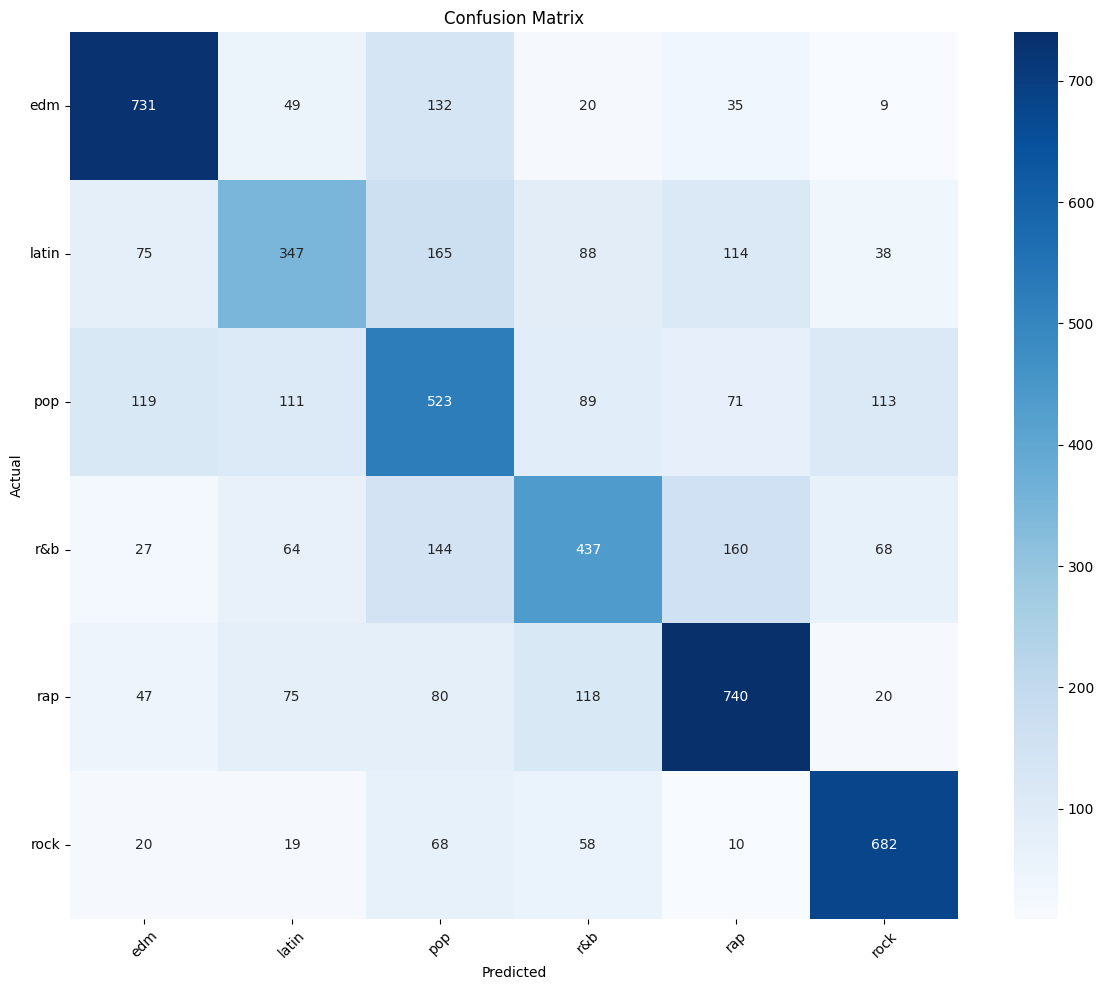

In [56]:
# Confusion matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=genre_encoder.classes_,
            yticklabels=genre_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

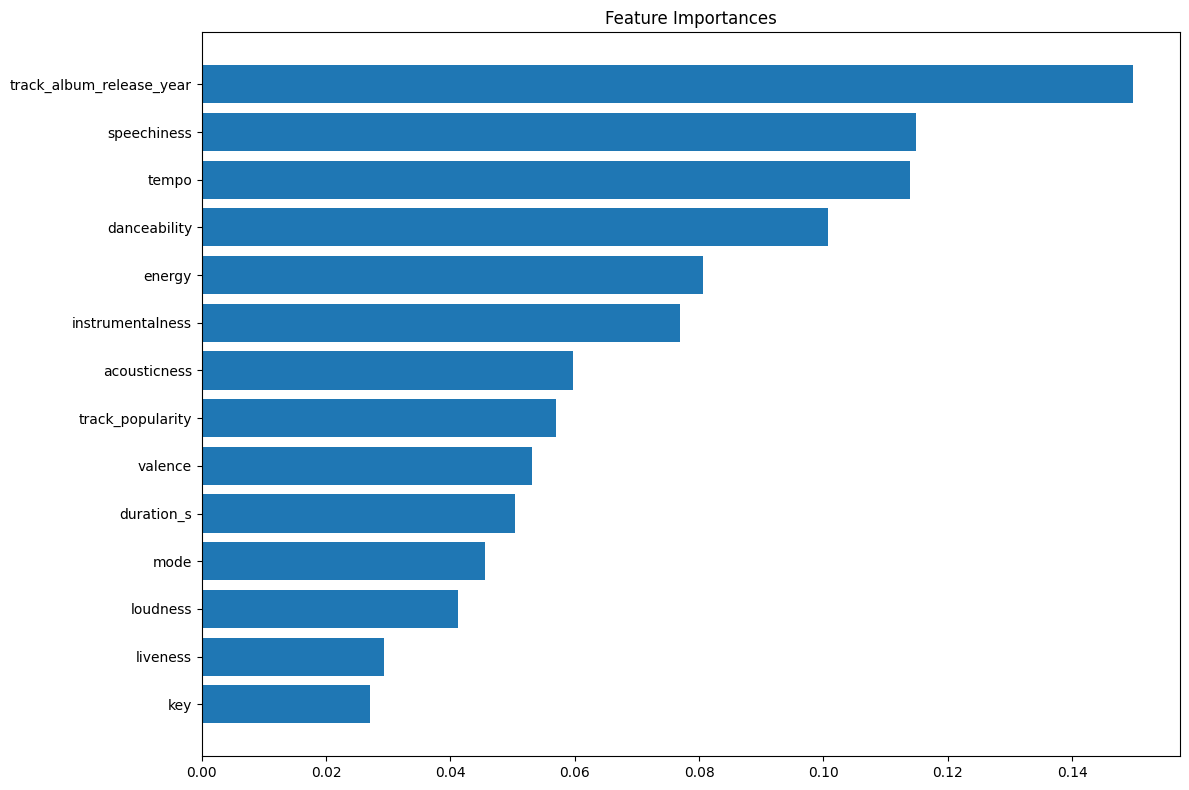

In [58]:
# Feature importance
if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(12, 8))
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

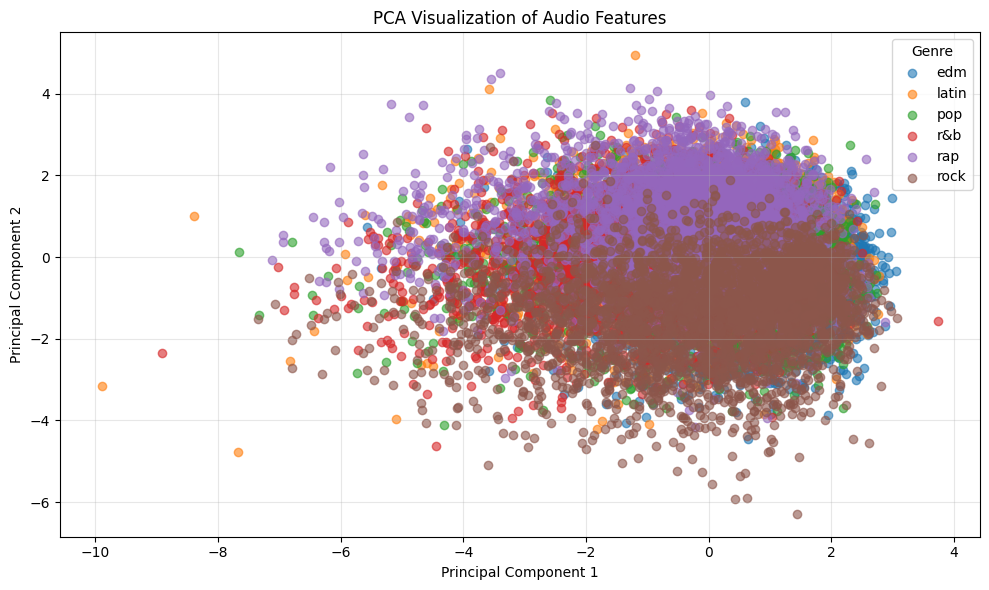

In [63]:
# PCA for dimensionality reduction (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))
for genre in np.unique(y_train):
    plt.scatter(X_pca[y_train == genre, 0],
                X_pca[y_train == genre, 1],
                label=genre_encoder.inverse_transform([genre])[0],
                alpha=0.6)
plt.title('PCA Visualization of Audio Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Genre')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()